In [1]:
from data_loader import get_dataset

In [7]:
session_times = get_dataset(url = "https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/refs/heads/master/data/web_page_data.csv" , 
                            file_name = "session_times")
session_times.head()

File doesn't exists. Downloading ...............


,Page,Time
0,Page A,0.21
1,Page B,2.53
2,Page A,0.35
3,Page B,0.71
4,Page A,0.67


In [4]:
import matplotlib.pyplot as plt

Text(0.5, 0.98, '')

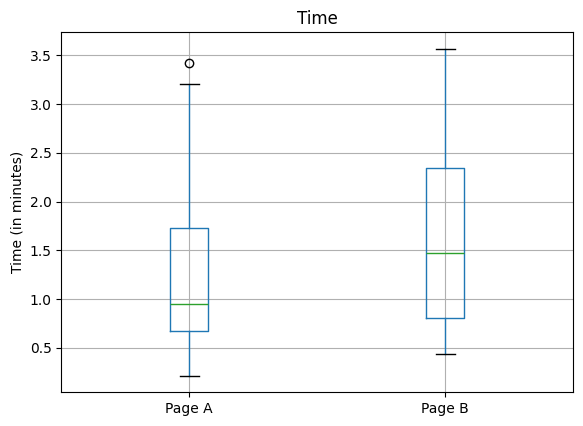

In [10]:
ax = session_times.boxplot(by = "Page" , column="Time")
ax.set_xlabel('')
ax.set_ylabel("Time (in minutes)")
plt.suptitle('')

In [9]:
mean_a = session_times[session_times["Page"] == "Page A"].Time.mean()
mean_b = session_times[session_times["Page"] == "Page B"].Time.mean()
mean_b - mean_a

0.3566666666666669

In [11]:
session_times["Page"].value_counts()

Page
Page A    21
Page B    15
Name: count, dtype: int64

In [20]:
import random
import pandas as pd

In [39]:
def perm_fun(x , nA , nB): 
    n = nA + nB 
    idx_B = set(random.sample(range(n) , nB))
    idx_A = set((range(n))) - idx_B
    return x.iloc[list(idx_B)].mean() - x.iloc[list(idx_A)].mean()

In [40]:
perm_diffs = [perm_fun(session_times.Time , nA= 21 , nB = 15) for _ in range(1000)]

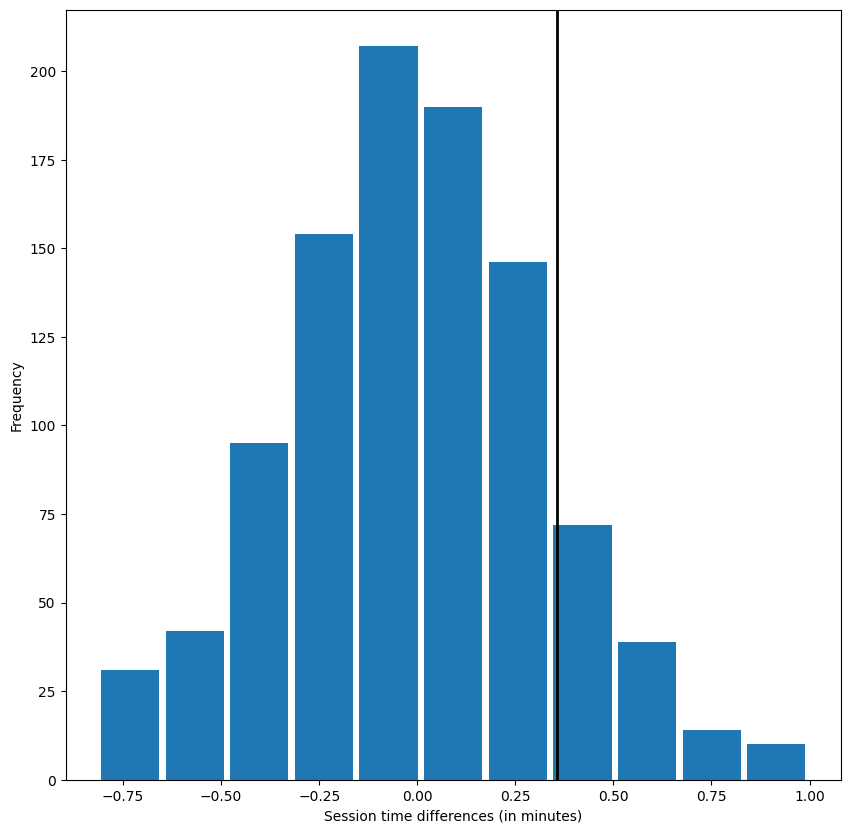

In [ ]:
fig , ax = plt.subplots(figsize=( 10 , 10))
ax.hist(perm_diffs , bins = 11 , rwidth = 0.9)
ax.axvline(x = mean_b - mean_a , color = 'black' , lw = 2)
ax.set_xlabel('Session time differences (in minutes)')
ax.set_ylabel('Frequency')
plt.show()

In [44]:
import numpy as np 
np.mean(perm_diffs > (mean_b - mean_a))

0.125